In [24]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [31]:

! pip install mplfinance

In [32]:
import mplfinance as mpf

In [27]:
dataset = ['BAC']
for datasets in dataset :
    Ticker = yf.Ticker(datasets)
    data = Ticker.history(start='2023-09-01', end='2023-10-13')
    filename=f'{dataset}_data.csv'
    data.to_csv(filename)
    print(f'Download data for {dataset} and saved as {filename}')

Download data for ['BAC'] and saved as ['BAC']_data.csv


In [28]:
data_start = '2023-09-01'
data_end= '2023-10-13'
Ticker = 'BAC'
data = yf.download(Ticker, start=data_start, end=data_end)



[*********************100%%**********************]  1 of 1 completed


In [29]:
data[:2]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-01,28.760000,29.129999,28.76,28.98,28.98,35192000
2023-09-05,28.940001,29.120001,28.50,28.65,28.65,46543600


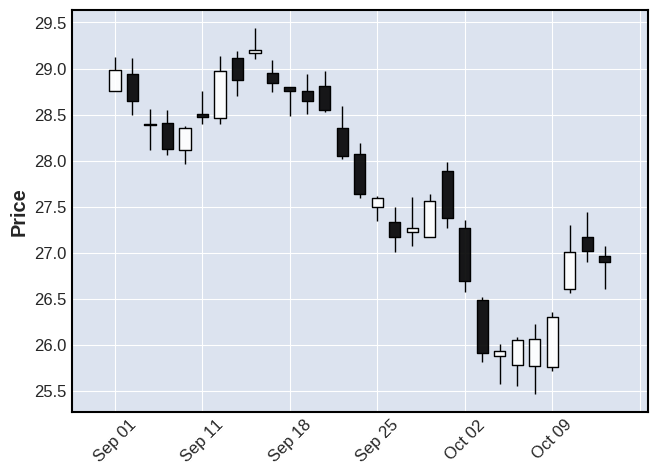

In [38]:
mpf.plot(data, type='candle')
plt.show()



In [39]:
strike = np.linspace(50, 150, 24)
ttm = np.linspace(0.5, 2.5, 25)
strike, ttm = np.meshgrid(strike, ttm)

In [40]:
strike[:2]

array([[ 50.        ,  54.34782609,  58.69565217,  63.04347826,
         67.39130435,  71.73913043,  76.08695652,  80.43478261,
         84.7826087 ,  89.13043478,  93.47826087,  97.82608696,
        102.17391304, 106.52173913, 110.86956522, 115.2173913 ,
        119.56521739, 123.91304348, 128.26086957, 132.60869565,
        136.95652174, 141.30434783, 145.65217391, 150.        ],
       [ 50.        ,  54.34782609,  58.69565217,  63.04347826,
         67.39130435,  71.73913043,  76.08695652,  80.43478261,
         84.7826087 ,  89.13043478,  93.47826087,  97.82608696,
        102.17391304, 106.52173913, 110.86956522, 115.2173913 ,
        119.56521739, 123.91304348, 128.26086957, 132.60869565,
        136.95652174, 141.30434783, 145.65217391, 150.        ]])

In [41]:
iv = (strike  - 100) ** 2 /(100 * strike) / ttm

In [44]:
from mpl_toolkits.mplot3d import Axes3D

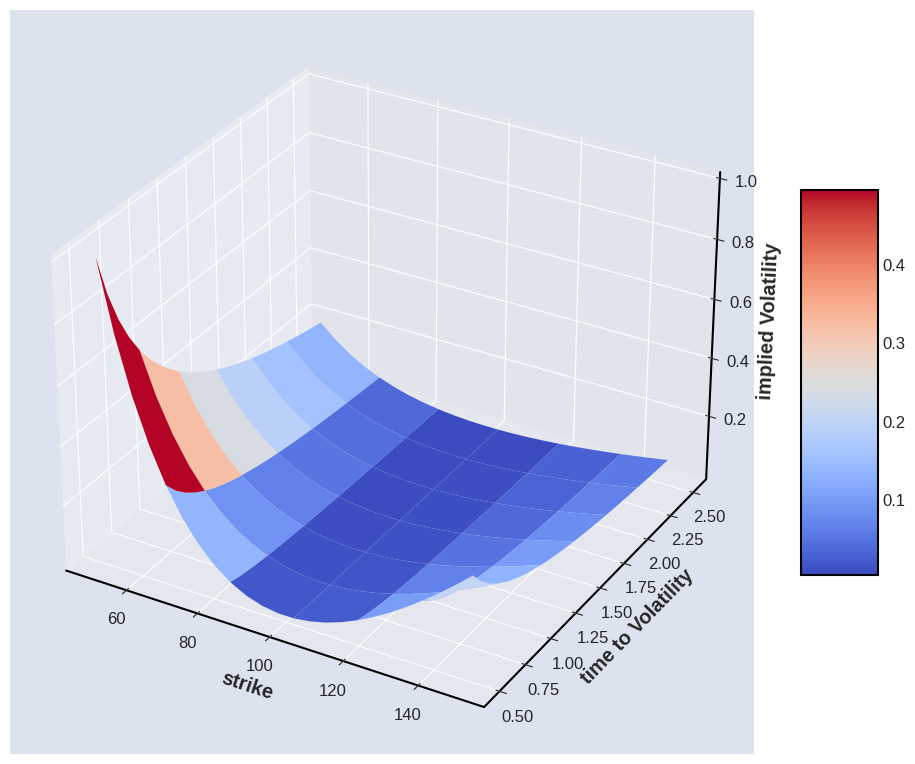

In [51]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(strike, ttm, iv, rstride=4, cstride=4,
                       cmap = plt.cm.coolwarm, linewidth=0.5,
                       antialiased=True)
ax.set_xlabel('strike')
ax.set_ylabel('time to Volatility')
ax.set_zlabel('implied Volatility')
fig.colorbar(surf, shrink=0.5, aspect=5)